# Lending Club EDA

## Business Objectives

This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

## Problem Statement


Solving this assignment will give you an idea about how real business problems are solved using EDA. In this case study, apart from applying the techniques you have learnt in EDA, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

<b>Two types of risks are associated with the bank’s decision:</b>

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

## Data Overview

In [565]:
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [566]:
# Lets read the file into pandas dataframe and gather its shape(rows, columns)
df = pd.read_csv('loan.csv', date_parser=True)
df.shape

/home/sachin/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(39717, 111)

In [567]:
# let see the data types of columns spread out
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [568]:
# Let's eye-on the data to understand the data types and whether it requires some modification for our analysis
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.0,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.0,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


We can see term, int_rate, emp_length requires data pre-processing. Also, we can see there are columns having null values

In [569]:
# Lets now gather information of no of nan data across columns
df.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


There are many columns filled entirely with nan values and also few columns by some percentage. Let's gather the percentage of these columns later and decide which columns should be removed.

In [570]:
# From the business objective we are aware, we have to find whether the applicant is prone to become defaulter or 
# not. From the given dictionary, we can understand the column that illustrates these characteristics is 'loan_status'
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

## Cleaning Data

In [571]:
# percentage of missing values in each column
drop_columns = df.columns[df.isnull().sum()/len(df)*100 > 30]
drop_columns

Index(['desc', 'mths_since_last_delinq', 'mths_since_last_record',
       'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint',
       'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
     

In [572]:
df.drop(drop_columns, inplace=True, axis=1)
df.shape

(39717, 53)

In [573]:
df.isnull().sum()/len(df)*100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [574]:
object_columns = df.columns[df.dtypes==object]

In [575]:
# Since, we are insterested only in Deafulter and Non-Defaulter let's drop 'Current'
df = df[df.loan_status != 'Current']
df.shape

(38577, 53)

In [576]:
# pre-processing features
df['term'] = df.term.apply(lambda x: int(x.strip().split(' ')[0]))
df['int_rate'] = df.int_rate.apply(lambda x: float(x.rstrip('%')))
df['zip_code'] = df.zip_code.apply(lambda x: x.rstrip('xx'))

In [577]:
# pre-processing features
def get_emp_len(length):
    if '10+ years' in length:
        return 10
    elif '< 1 year' in length:
        return 0
    else:
        return int(length.split(' ')[0])
    
df['emp_length'] = df.emp_length.fillna('-99 not mentioned')
df['emp_length'] = df.emp_length.apply(lambda x: get_emp_len(x))

In [578]:
# Let's remove unwanted columns - One value that is spread across every member id like 'application_type'
redundant_columns = ['policy_code', 'initial_list_status', 'collections_12_mths_ex_med', 'application_type', 
                     'acc_now_delinq', 'chargeoff_within_12_mths', 'tax_liens']
df.drop(redundant_columns, inplace=True, axis=1)

In [579]:
# Let's fetch month and year
df['year'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y').year)
df['month'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y').month)

## Business Analysis 

The company wants to understand the driving factors (or driver variables) behind loan default, Thus, they can use these factors in approval/rejection of the loan there by mitigating 2 types of risk.

1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

There are 3 types of variables -

1. Those which are related to the applicant (demographic variables such as age, occupation, employment details etc.)
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Since, the customer behaviour variables are not available at the time of loan application, and thus lets remove it from our dataframe.

In [580]:
# Let's go through the columns to identify customer behavioural features which may not need for our analysis
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'delinq_amnt',
       'pub_rec_bankruptcies', 'year', 'month'],
      dtype='object')

In [581]:
customer_behaviour =  ["delinq_2yrs",  "earliest_cr_line",  "inq_last_6mths",  "open_acc",  "revol_bal",
  "revol_util",  "total_acc",  "out_prncp",  "out_prncp_inv",  "total_pymnt",  "total_pymnt_inv",
  "total_rec_prncp",  "total_rec_int",  "total_rec_late_fee",  "recoveries",  "collection_recovery_fee",
  "last_pymnt_d",  "last_pymnt_amnt",  "last_credit_pull_d",  "delinq_amnt"]

In [582]:
# Dropping customer behaviour columns
df.drop(customer_behaviour, inplace=True, axis=1)
df.reset_index(drop=True, inplace=True)
df.shape

(38577, 28)

Now we are all set to do analysis that helps in predicting the important factors that helps in determining the defaulter

## Univariate Analysis

In [583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38577 entries, 0 to 38576
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   member_id             38577 non-null  int64  
 2   loan_amnt             38577 non-null  int64  
 3   funded_amnt           38577 non-null  int64  
 4   funded_amnt_inv       38577 non-null  float64
 5   term                  38577 non-null  int64  
 6   int_rate              38577 non-null  float64
 7   installment           38577 non-null  float64
 8   grade                 38577 non-null  object 
 9   sub_grade             38577 non-null  object 
 10  emp_title             36191 non-null  object 
 11  emp_length            38577 non-null  int64  
 12  home_ownership        38577 non-null  object 
 13  annual_inc            38577 non-null  float64
 14  verification_status   38577 non-null  object 
 15  issue_d            

In [584]:
df.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,pub_rec,pub_rec_bankruptcies,year,month
38572,92187,92174,2500,2500,1075.0,36,8.07,78.42,A,A4,FiSite Research,4,MORTGAGE,110000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,home_improvement,Home Improvement,802,CO,11.33,0,NaN,2007,7
38573,90665,90607,8500,8500,875.0,36,10.28,275.38,C,C1,"Squarewave Solutions, Ltd.",3,RENT,18000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Retiring credit card debt,274,NC,6.40,0,NaN,2007,7
38574,90395,90390,5000,5000,1325.0,36,8.07,156.84,A,A4,NaN,0,MORTGAGE,100000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,MBA Loan Consolidation,017,MA,2.30,0,NaN,2007,7
38575,90376,89243,5000,5000,650.0,36,7.43,155.38,A,A2,NaN,0,MORTGAGE,200000.0,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,JAL Loan,208,MD,3.72,0,NaN,2007,7
38576,87023,86999,7500,7500,800.0,36,13.75,255.43,E,E2,Evergreen Center,0,OWN,22000.0,Not Verified,Jun-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,debt_consolidation,Consolidation Loan,027,MA,14.29,0,NaN,2007,6


### loan amount

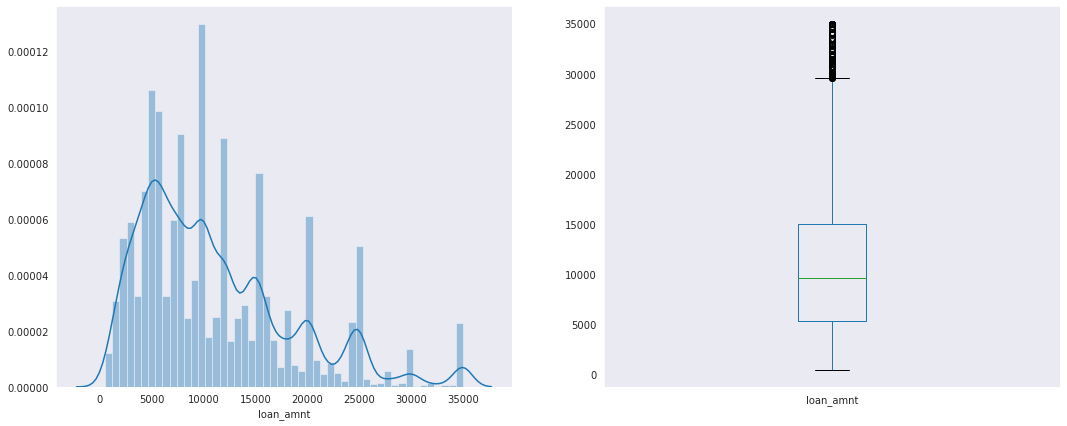

In [585]:
# Plotting Loan amount to see how the data is spread

plt.figure(figsize = (18,7))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['loan_amnt']);

plt.subplot(122)
df['loan_amnt'].plot.box()

plt.show()

The data is skewed towards right side and does have outliers which requires logarithmic transformation to bring it to normal distribution

### funded_amnt

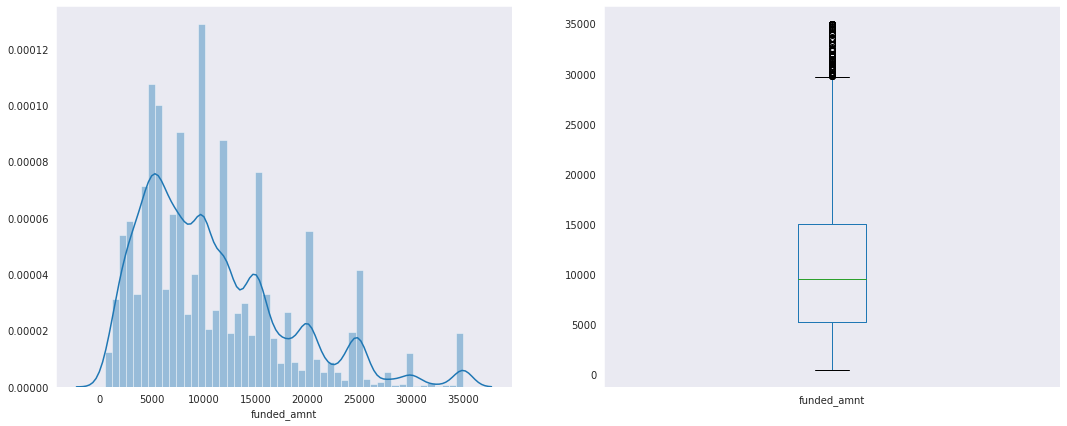

In [586]:
# Plotting funded amount to see how the data is spread

plt.figure(figsize = (18,7))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['funded_amnt']);

plt.subplot(122)
df['funded_amnt'].plot.box()

plt.show()

The data is skewed towards right side and does have outliers which requires logarithmic transformation to bring it to normal distribution

### funded_amnt_inv

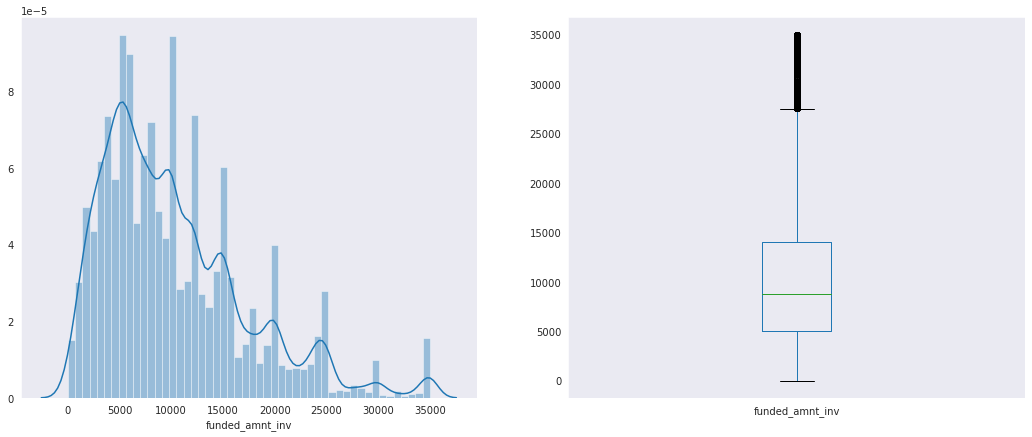

In [587]:
# Plotting funded amount inv to see how the data is spread

plt.figure(figsize = (18,7))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['funded_amnt_inv']);

plt.subplot(122)
df['funded_amnt_inv'].plot.box()

plt.show()

The data is skewed towards right side and does have outliers which requires logarithmic transformation to bring it to normal distribution

### term

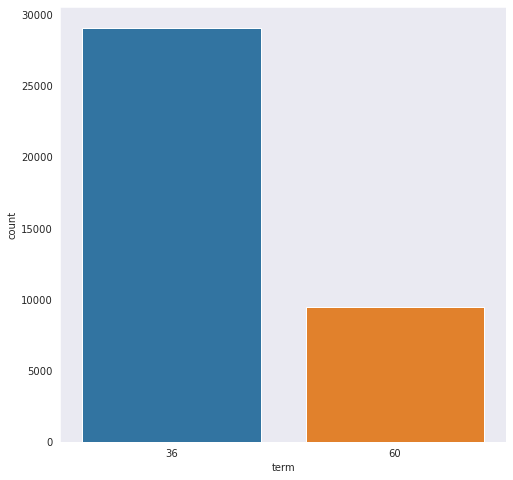

In [588]:
# Frequency distribution of Loan Term

plt.figure(figsize = (8,8))
sns.countplot(x="term", data=df)
plt.show()

75% of data constitutes of loan term of 36 years

In [589]:
df.term.value_counts()/ df.term.value_counts().sum()

36    0.754232
60    0.245768
Name: term, dtype: float64

### int_rate

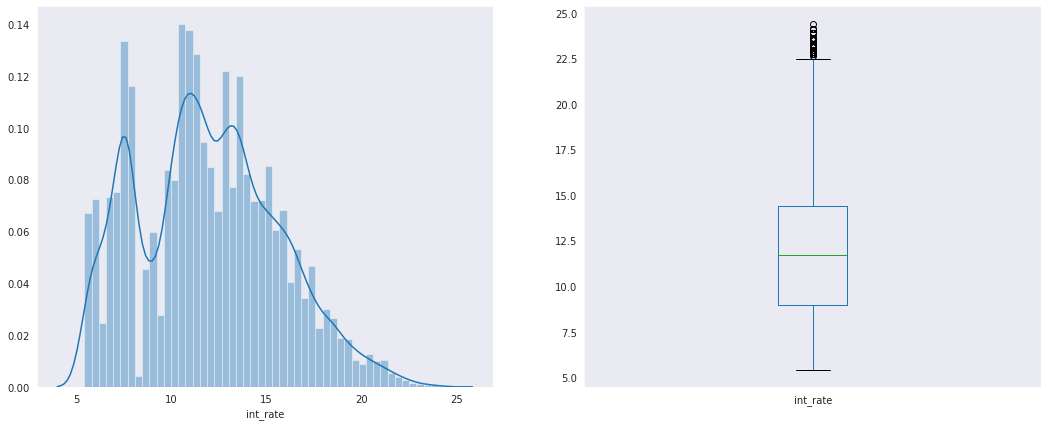

In [590]:
# Plotting interest rate to see how the data is spread

plt.figure(figsize = (18,7))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['int_rate']);

plt.subplot(122)
df['int_rate'].plot.box()

plt.show()

The data seems or appears like bi-normal distribution

### grade

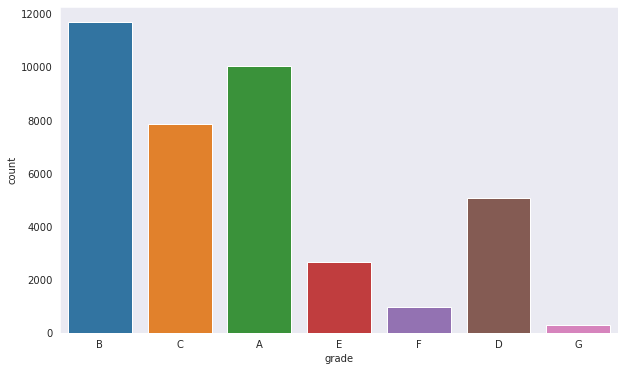

In [591]:
# Frequency distribution of Grade

plt.figure(figsize = (10,6))
sns.countplot(x="grade", data=df)
plt.show()

Approx 75% of frequency is constituted by B, C and A

In [592]:
df.grade.value_counts()/ df.grade.value_counts().sum()

B    0.302641
A    0.260388
C    0.203074
D    0.131814
E    0.069031
F    0.025300
G    0.007751
Name: grade, dtype: float64

### sub-grade

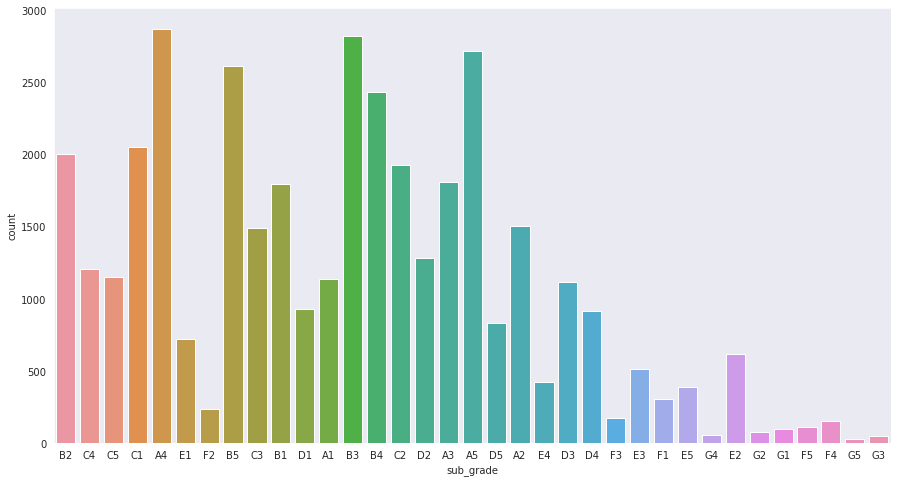

In [593]:
# Frequency distribution of Sub-Grade

plt.figure(figsize = (15,8))
sns.countplot(x="sub_grade", data=df)
plt.show()

### home-ownership

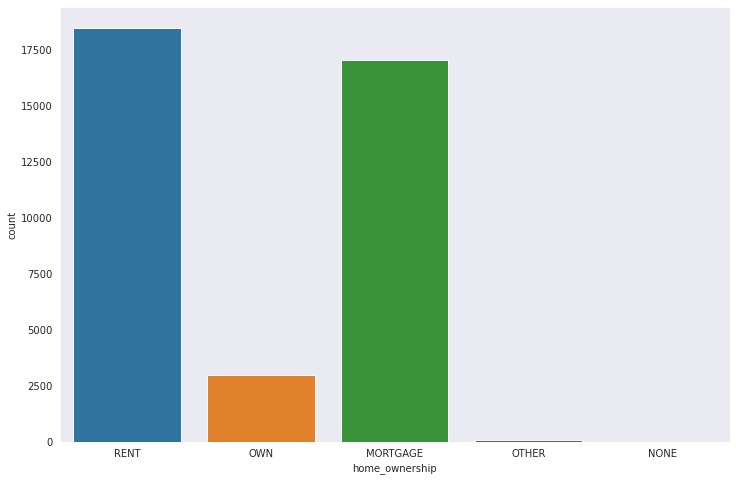

In [594]:
# Frequency distribution of Home-Ownership

plt.figure(figsize = (12,8))
sns.countplot(x="home_ownership", data=df)
plt.show()

Rent and Mortgage poses more in frequency 

In [595]:
df.home_ownership.value_counts()/ df.home_ownership.value_counts().sum()

RENT        0.479042
MORTGAGE    0.441221
OWN         0.077118
OTHER       0.002540
NONE        0.000078
Name: home_ownership, dtype: float64

### emp-length

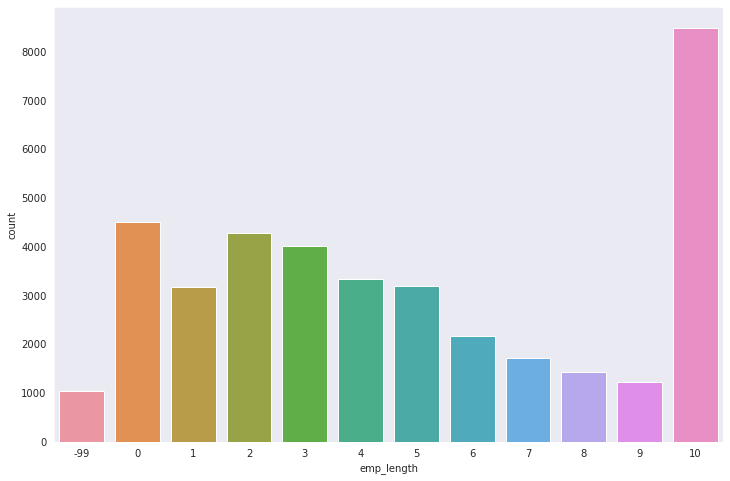

In [596]:
# Frequency distribution of Emp-Length

plt.figure(figsize = (12,8))
sns.countplot(x="emp_length", data=df)
plt.show()

-99, is nan imputed value. there by max frequency constitues by emp_len 10 or more than 10  

In [597]:
df.emp_length.value_counts()/ df.emp_length.value_counts().sum()

 10    0.220027
 0     0.116857
 2     0.111232
 3     0.104000
 4     0.086632
 5     0.082795
 1     0.082147
 6     0.056199
 7     0.044353
 8     0.037198
 9     0.031781
-99    0.026778
Name: emp_length, dtype: float64

### annual_inc

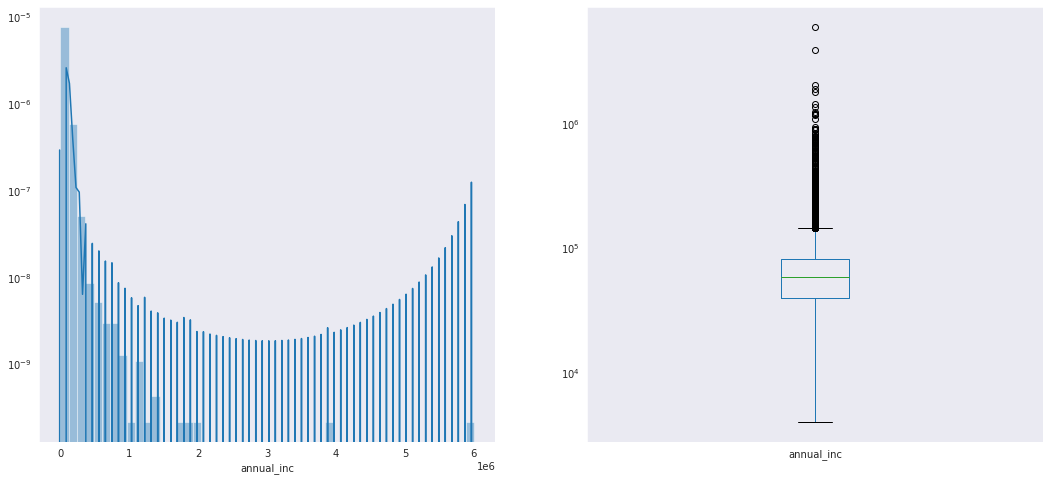

In [598]:
# Plotting interest rate to see how the data is spread

plt.figure(figsize = (18,8))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['annual_inc']);
plt.yscale('log')

plt.subplot(122)
df['annual_inc'].plot.box()
plt.yscale('log')

plt.show()

Entire data lies within log range of 10^3 rest lies outliers

### verification_status

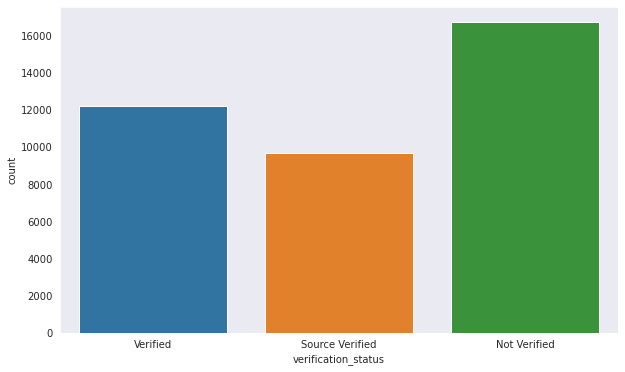

In [599]:
# Frequency distribution of Verification Status

plt.figure(figsize = (10,6))
sns.countplot(x="verification_status", data=df)
plt.show()

The data distribution of Not-Verified seems high. 

In [600]:
df.verification_status.value_counts()/ df.verification_status.value_counts().sum()

Not Verified       0.432745
Verified           0.316406
Source Verified    0.250849
Name: verification_status, dtype: float64

### loan_status

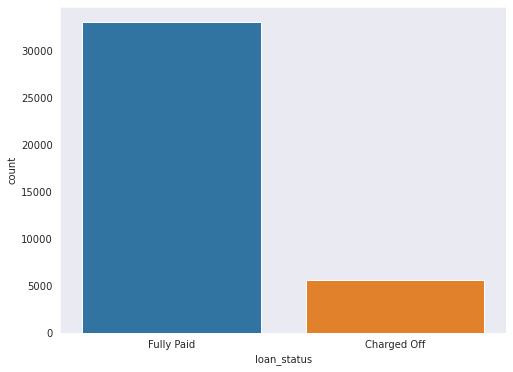

In [601]:
# Frequency distribution of Loan Status

plt.figure(figsize = (8,6))
sns.countplot(x="loan_status", data=df)
plt.show()

Loan status of defaulter is 14%

In [602]:
df.loan_status.value_counts()/ df.loan_status.value_counts().sum()

Fully Paid     0.854136
Charged Off    0.145864
Name: loan_status, dtype: float64

### purpose

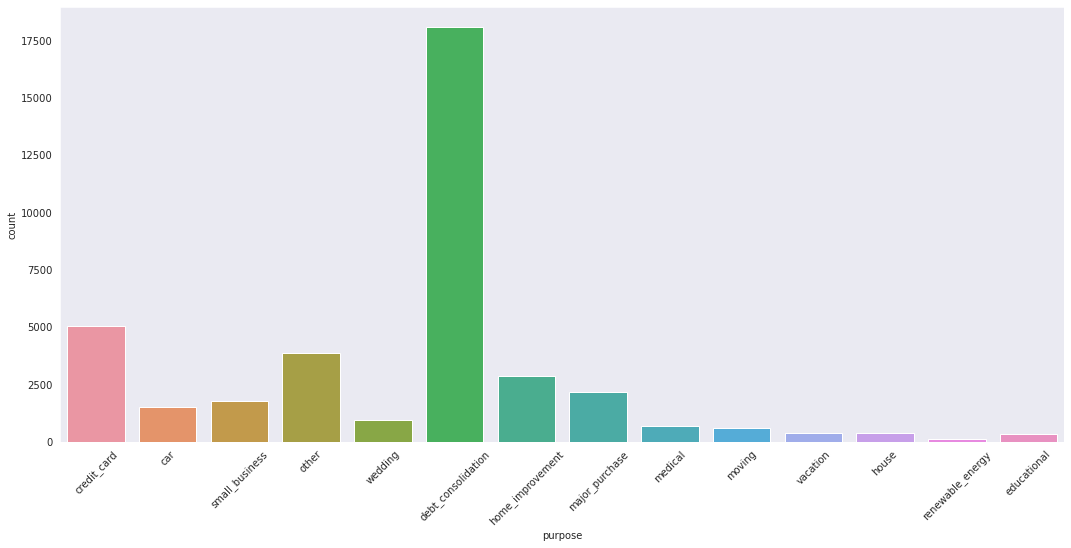

In [603]:
# Frequency distribution of Purpose

plt.figure(figsize = (18,8))
sns.countplot(x="purpose", data=df)
plt.xticks(rotation=45)
plt.show()

Nearly, 45% of loan is taken for debt_consolidation purpose followed by credit card at 13%

In [604]:
df.purpose.value_counts()/ df.purpose.value_counts().sum()

debt_consolidation    0.468025
credit_card           0.130311
other                 0.100189
home_improvement      0.074526
major_purchase        0.055733
small_business        0.045468
car                   0.038857
wedding               0.024004
medical               0.017653
moving                0.014931
vacation              0.009721
house                 0.009513
educational           0.008425
renewable_energy      0.002644
Name: purpose, dtype: float64

### dti

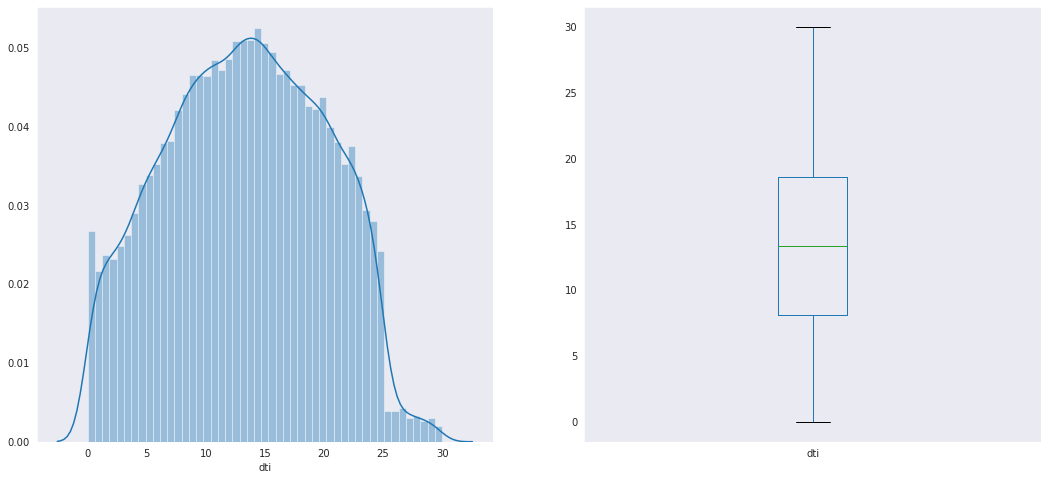

In [605]:
plt.figure(figsize = (18,8))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['dti']);
# plt.yscale('log')

plt.subplot(122)
df['dti'].plot.box()
# plt.yscale('log')

plt.show()

dti is normally distributed

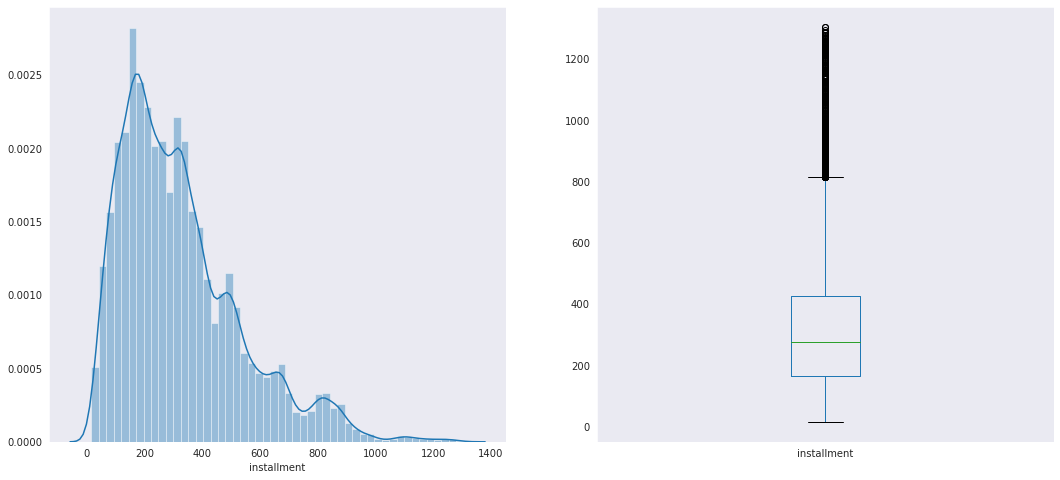

In [606]:
# Plotting installment to see how the data is spread

plt.figure(figsize = (18,8))
sns.set_style("dark")

plt.subplot(121)
sns.distplot(df['installment']);
# plt.yscale('log')

plt.subplot(122)
df['installment'].plot.box()
# plt.yscale('log')

plt.show()

As we have seen every continous data other than dti appears to be right skewed 

## Bi-variate Analysis

In [607]:
df['loan_status'] = df.loan_status.apply(lambda x: 0 if 'Fully Paid' == x else 1)

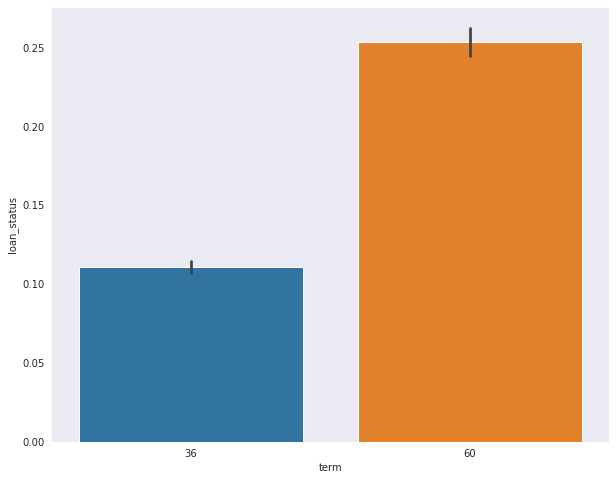

In [608]:
# distribution of term over loan_status

plt.figure(figsize = (10,8))
sns.set_style("dark")
sns.barplot(df.term, df.loan_status)

plt.show()

We can see here, as the term increases the chances of defaulter also increases. Thus becomes imp factor

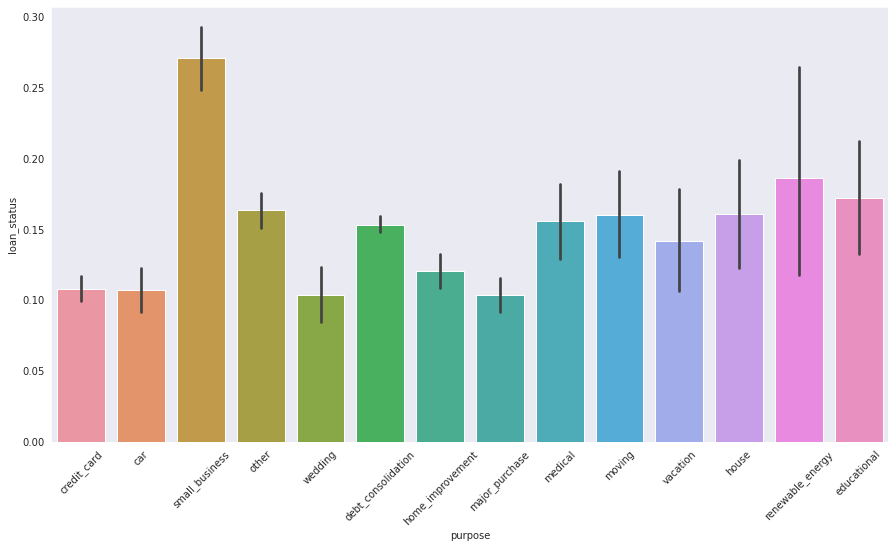

In [609]:
# distribution of purpose over loan_status

plt.figure(figsize = (15,8))
sns.barplot(df.purpose, df.loan_status, estimator=np.mean)
plt.xticks(rotation=45)
plt.show()

The percentage of defaulter is high for small business

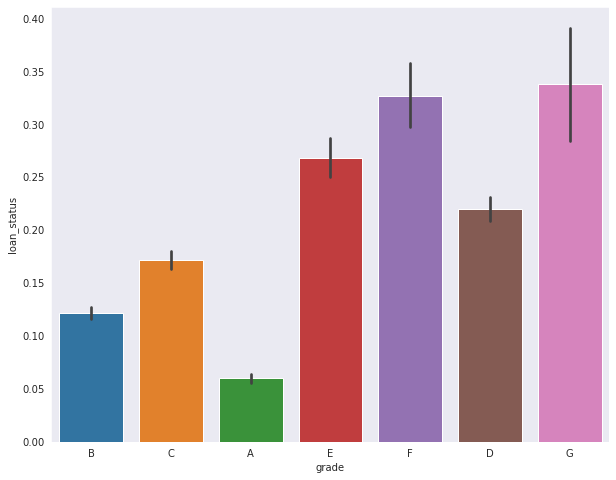

In [610]:
# distribution of grade over loan_status

plt.figure(figsize = (10,8))
sns.barplot(df.grade, df.loan_status, estimator=np.mean)
plt.show()

As the grade increases chances of defaulter also increases

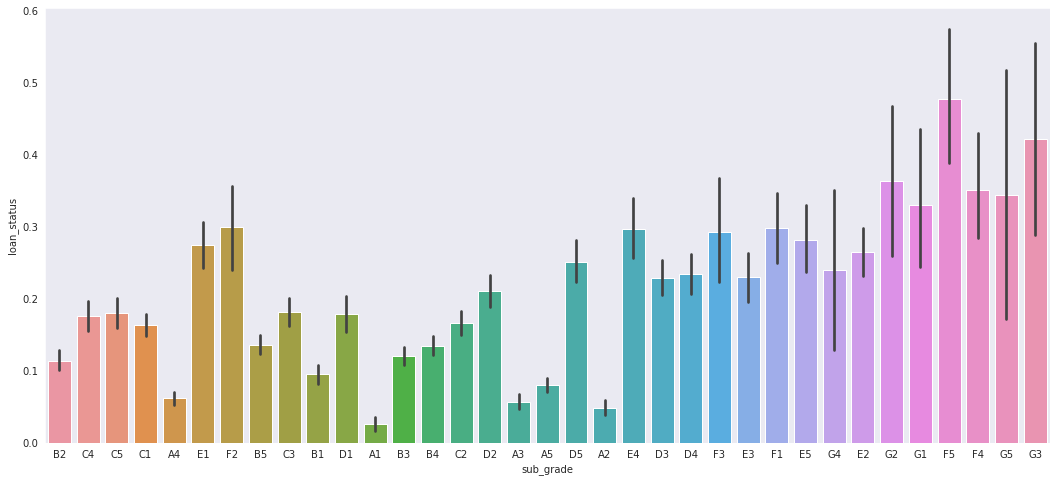

In [611]:
# distribution of sub-grades over loan_status

plt.figure(figsize = (18,8))
sns.barplot(df.sub_grade, df.loan_status, estimator=np.mean)
plt.show()

Amongst all sub-grades, chances of defaulter is high for F5 and G3

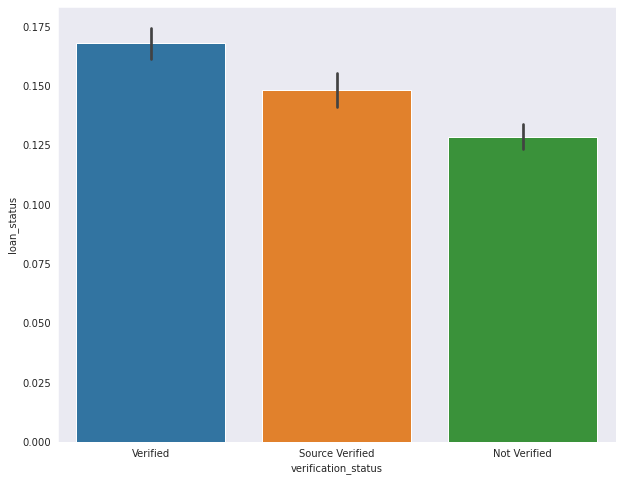

In [612]:
# distribution of verification_status over loan_status

plt.figure(figsize = (10,8))
sns.barplot(df.verification_status, df.loan_status)
plt.show()

Though becoming defaulter for verified is more but the risk value is less than 0.175 and thus, it doesn't seem to be a imp factor to decide defaulter

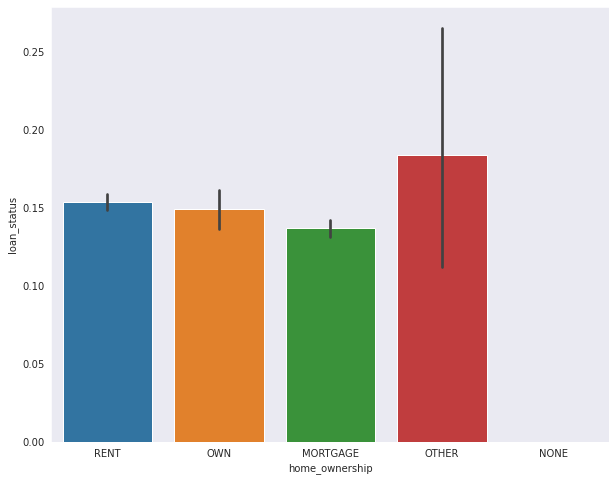

In [613]:
# distribution of home_ownership over loan_status

plt.figure(figsize = (10,8))
sns.barplot(df.home_ownership, df.loan_status)
plt.show()

percentage of defaulter for home_ownership seems uniform across rent, own, mortgage and relatively high for other

<Figure size 1080x864 with 0 Axes>

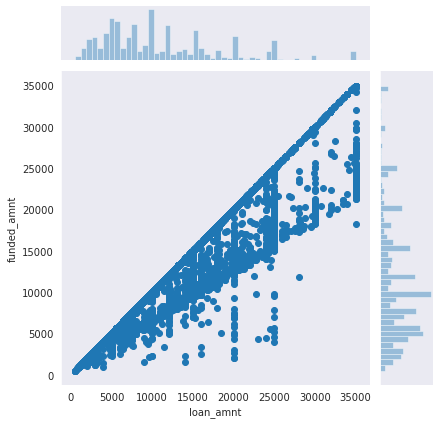

In [614]:
# plt shows corr bw loan amount and funded amount

plt.figure(figsize = (15,12))
sns.jointplot( x="loan_amnt", y="funded_amnt", data=df)
plt.show()

Amount funded decreases by its strong positive correlation as the loan amount increases

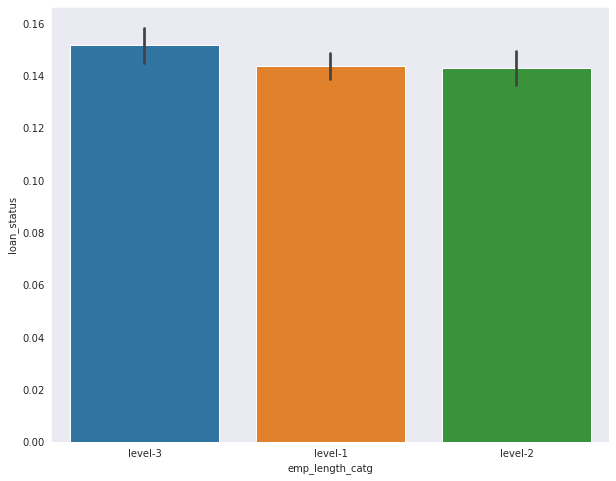

In [615]:
# distribution of emp_length over loan_status

def get_emp_len_catg(val):
    if val <= 3:
        return 'level-1'
    elif val > 3 and val <= 7:
        return 'level-2'
    else:
        return 'level-3'
        
df['emp_length_catg'] = df.emp_length.apply(lambda x: get_emp_len_catg(x))

plt.figure(figsize = (10,8))
sns.barplot(df.emp_length_catg, df.loan_status)
plt.show()

Doesn't show much imp in deciding defaulter

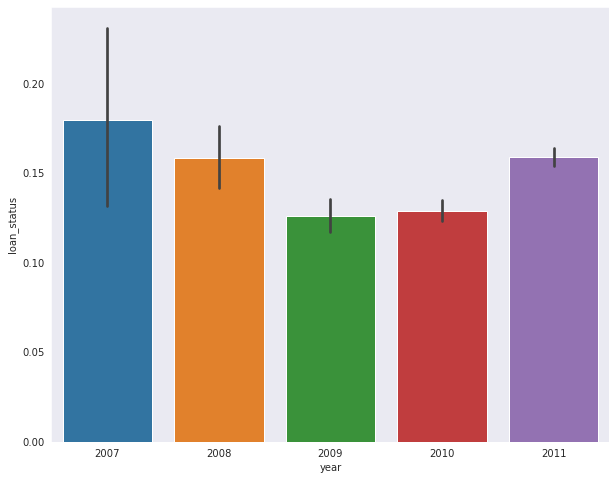

In [616]:
# distribution of year over loan_status

plt.figure(figsize = (10,8))
sns.barplot(df.year, df.loan_status, estimator=np.mean)
plt.show()

defaulter rate gradually reduced from 2007 till 2009 & again saw a upward trend after 2009

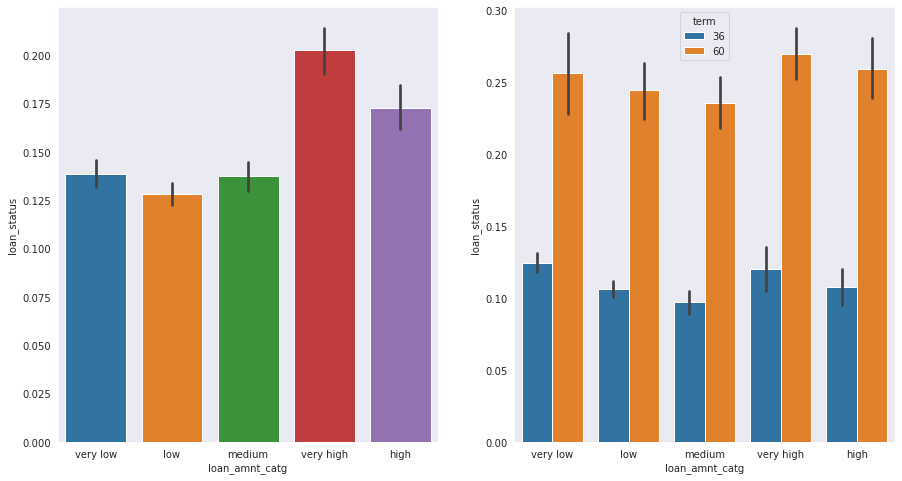

In [617]:
# distribution of loan_amount over loan_status

def get_loan_catg(val):
    if val <= 5000:
        return 'very low'
    elif val > 5000 and val <= 10000:
        return 'low'
    elif val > 10000 and val <= 15000:
        return 'medium'
    elif val > 15000 and val <= 20000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt_catg'] = df.loan_amnt.apply(lambda x: get_loan_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.loan_amnt_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='loan_amnt_catg', y='loan_status', hue='term', data=df)
plt.show()

defaulter rate is high of very-high loan amount and followed by high across 36 and 60 years term.
thus becomes a imp factor

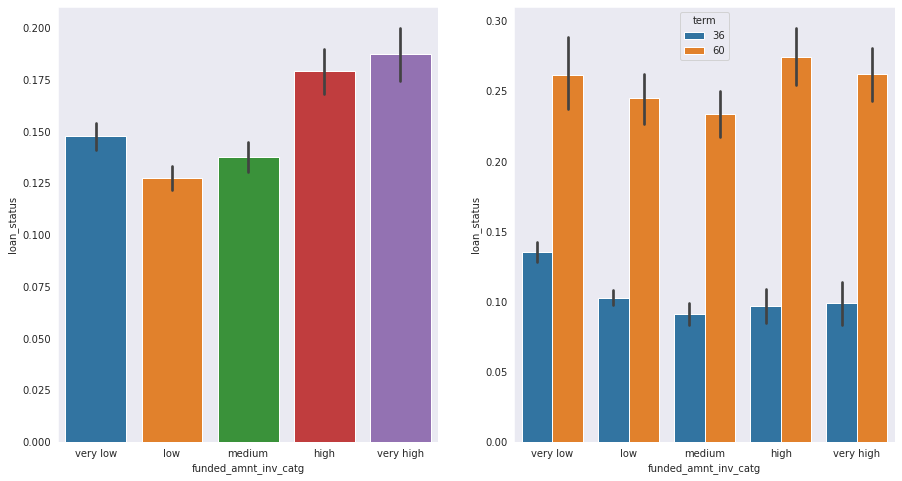

In [618]:
# distribution of funded_amount_inv over loan_status

def get_fund_catg(val):
    if val <= 5000:
        return 'very low'
    elif val > 5000 and val <= 10000:
        return 'low'
    elif val > 10000 and val <= 15000:
        return 'medium'
    elif val > 15000 and val <= 20000:
        return 'high'
    else:
        return 'very high'
        
df['funded_amnt_inv_catg'] = df.funded_amnt_inv.apply(lambda x: get_fund_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.funded_amnt_inv_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='funded_amnt_inv_catg', y='loan_status', hue='term', data=df)
plt.show()

We can observe as the funded_amount_inv increases the defaulter percentage increases.
Thus becomes a imp factor

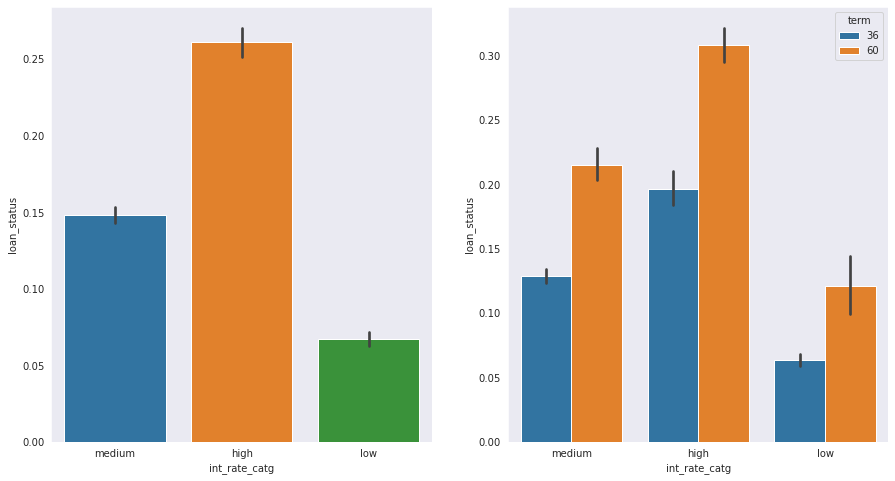

In [619]:
# distribution of int_rate over loan_status

def get_int_catg(val):
    if val <= 10:
        return 'low'
    elif val > 10 and val <= 15:
        return 'medium'
    else:
        return 'high'
        
df['int_rate_catg'] = df.int_rate.apply(lambda x: get_int_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.int_rate_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='int_rate_catg', y='loan_status', hue='term', data=df)
plt.show()

We can observe as the int_rate increases the defaulter percentage increases. Thus becomes a imp factor

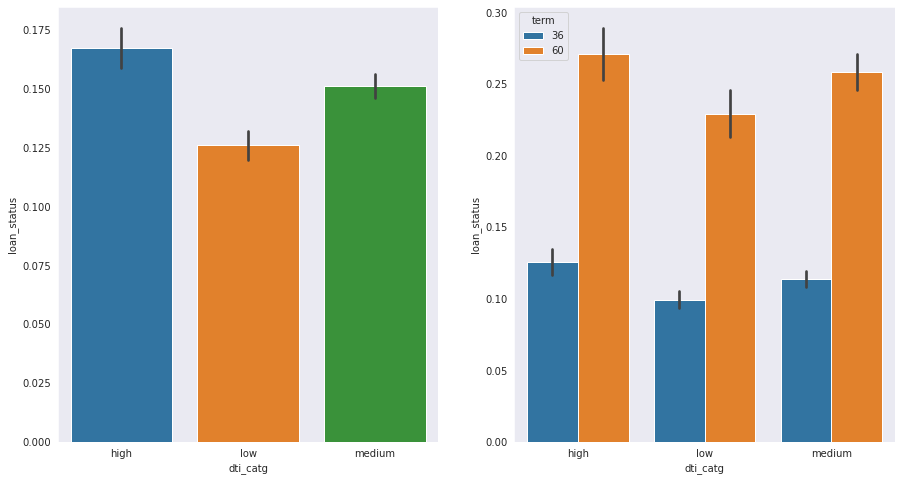

In [620]:
# distribution of dti over loan_status

def get_dti_catg(val):
    if val <= 10:
        return 'low'
    elif val > 10 and val <= 20:
        return 'medium'
    else:
        return 'high'
        
df['dti_catg'] = df.dti.apply(lambda x: get_dti_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.dti_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='dti_catg', y='loan_status', hue='term', data=df)
plt.show()

We can observe as the dti increases from low to high the defaulter percentage increases. Thus becomes a imp factor

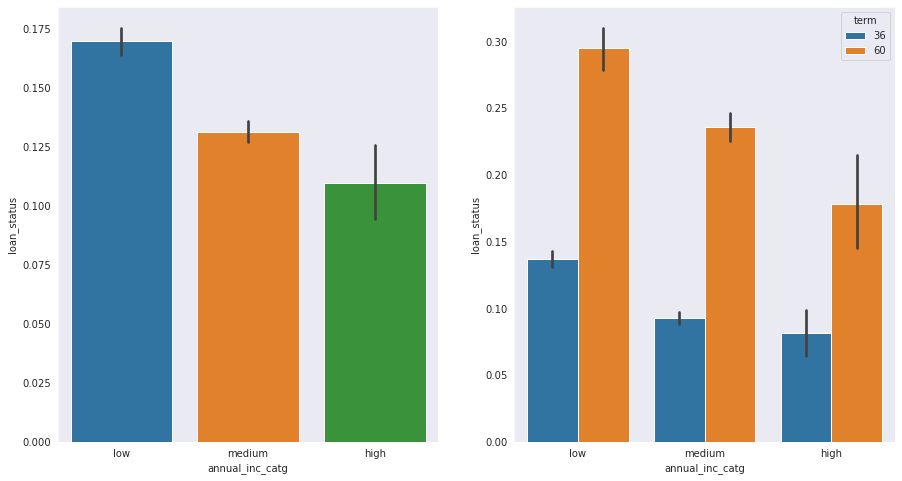

In [621]:
# distribution of annual_inc over loan_status

def get_income_catg(val):
    if val <= 50000:
        return 'low'
    elif val > 50000 and val <= 150000:
        return 'medium'
    else:
        return 'high'
        
df['annual_inc_catg'] = df.annual_inc.apply(lambda x: get_income_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.annual_inc_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='annual_inc_catg', y='loan_status', hue='term', data=df)
plt.show()

We can observe the defaulter is the one with less annual_inc and is inversely proportional with defaulter. Thus becomes imp factor

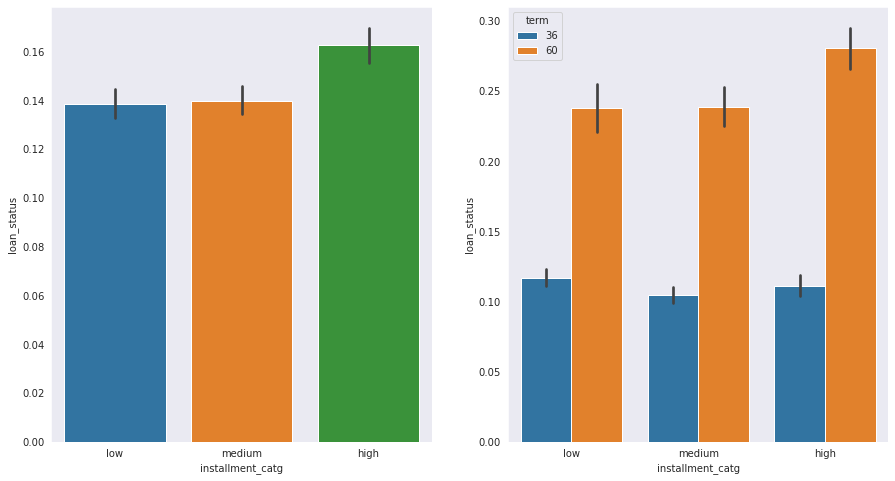

In [622]:
# distribution of installment over loan_status

def get_installment_catg(val):
    if val <= 200:
        return 'low'
    elif val > 200 and val <= 400:
        return 'medium'
    else:
        return 'high'
        
df['installment_catg'] = df.installment.apply(lambda x: get_installment_catg(x))

plt.figure(figsize = (15,8))

plt.subplot(121)
sns.barplot(df.installment_catg, df.loan_status)

plt.subplot(122)
sns.barplot(x='installment_catg', y='loan_status', hue='term', data=df)
plt.show()

We can observer here, by margin the one with high installment is more prone to become deafulter

### From our analysis, we can see term, grade, loan_amnt, funded_amount_inv, int_rate, dti, annual_inc features play a very important role in deciding loan defaulter

## Correlation to decide Imp Factors in Analyzing Loan Defaulter 

In [623]:
df.drop(['emp_title','title','pub_rec_bankruptcies'], inplace=True, axis=1)

In [624]:
from sklearn.preprocessing import LabelEncoder

df.fillna(0, inplace=True)
cat_columns_list = list(df.columns[df.dtypes==object])
for var in cat_columns_list:
    lb = LabelEncoder()
    df[var] = lb.fit_transform(df[var]).astype(int)

Feature
dti                     10.014763
annual_inc               9.504242
zip_code                 8.996331
int_rate                 6.649954
url                      5.964293
installment              5.702448
funded_amnt_inv          5.429561
addr_state               4.940772
member_id                4.744184
id                       4.515733
emp_length               4.012233
issue_d                  3.715115
purpose                  3.683719
sub_grade                3.408583
loan_amnt                2.714703
month                    2.473812
term                     2.380090
funded_amnt              2.203203
verification_status      1.573536
home_ownership           1.405820
pub_rec                  0.840622
dti_catg                 0.824964
emp_length_catg          0.775535
loan_amnt_catg           0.769548
grade                    0.764318
funded_amnt_inv_catg     0.730838
installment_catg         0.484521
annual_inc_catg          0.298559
year                     0.264749
int_ra

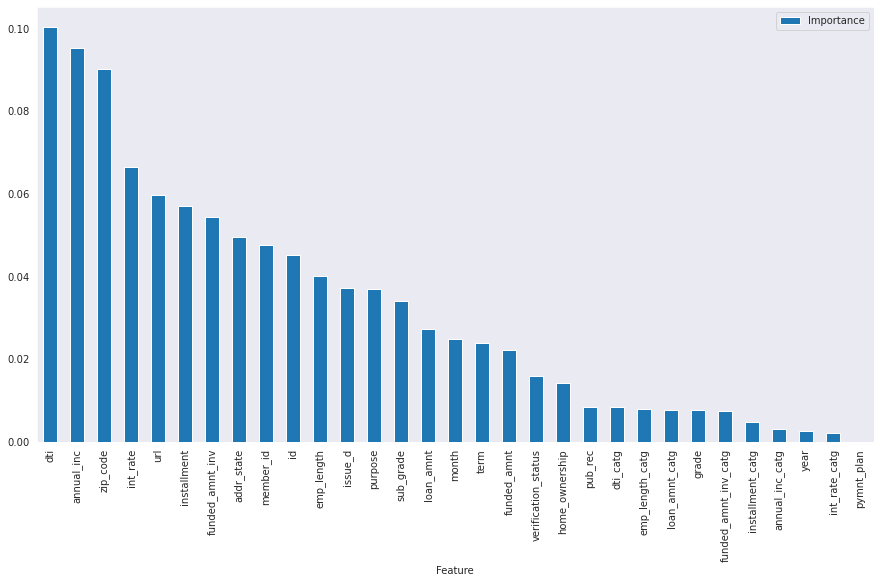

In [625]:
# Feature Importance

from sklearn.ensemble import RandomForestRegressor

target=df.pop('loan_status')
train=df.copy()
clf = RandomForestRegressor()
clf = clf.fit(train, target)

features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = clf.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

features.plot(kind='bar', figsize=(15, 8))
feature_score = features['Importance'] * 100
print(feature_score,"\n")
print("Total feature score:",sum(feature_score))

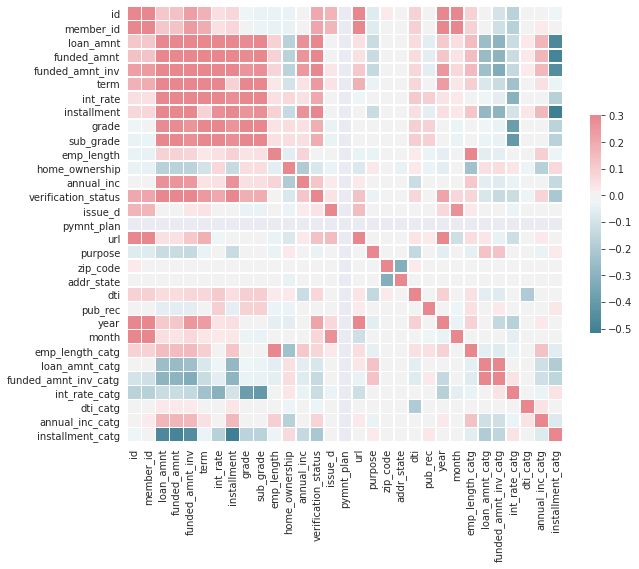

In [627]:
# Finding Correlation Matrix to understand imp factors that helps in deciding Defaulter

import seaborn as sns

# Compute the correlation matrix
corr = df.corr()


# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

We can see from both Feature importace(Machine learning algorithm) and corr heatmap, the important features found from our analysis seems to be correlated in deciding loan defaulter